<a href="https://colab.research.google.com/github/kavyajeetbora/geemap/blob/master/osmnx/osmnx_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependencies

In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 1.7 MB/s eta 0:00:00


## Import dependencies

In [78]:
import osmnx as ox
import geemap
import shapely
from ipyleaflet import GeoJSON
import json

## Load the map

In [50]:
Map = geemap.Map(center=(28.7, 77.1),zoom=10)
Map

Map(center=[28.7, 77.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

## Draw the polygon area on map and extract the area of interest

In [53]:
coordinates = Map.draw_features[0].geometry().getInfo()['coordinates'][0]
area = shapely.geometry.Polygon(coordinates)
print(area)

POLYGON ((77.211699 28.634065, 77.217922 28.626004, 77.225776 28.625891, 77.227492 28.629244, 77.228394 28.632558, 77.224531 28.637982, 77.217364 28.637681, 77.211699 28.634065))


## Extract the network from bounded polygon

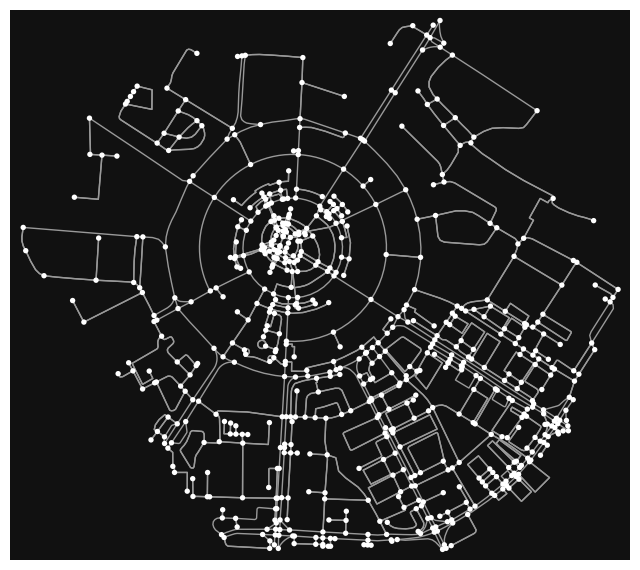

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [55]:
network = ox.graph.graph_from_polygon(area)
ox.plot_graph(network)

In [64]:
network

## Convert `MultiDiGraph` to `GeoDataFrame`

In [75]:
nodes, roads = ox.graph_to_gdfs(network)
roads = roads.reset_index()
roads.sample(3)

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,lanes,junction,service,access,tunnel,bridge
1285,10254967219,10254967220,0,1121147807,False,NaN,service,False,35.410,"LINESTRING (77.22449 28.62760, 77.22477 28.62781)",NaN,NaN,NaN,private,NaN,NaN
950,10248567782,10248567790,0,1120534752,False,NaN,footway,False,43.420,"LINESTRING (77.21922 28.63132, 77.21912 28.631...",NaN,NaN,NaN,NaN,NaN,NaN
821,9234681878,1762945073,0,570616026,True,Kasturba Gandhi Marg,secondary,False,40.668,"LINESTRING (77.22152 28.62973, 77.22171 28.62940)",NaN,NaN,NaN,NaN,NaN,NaN


## Convert the layer to GeoJSON layer and add to the map

In [84]:
roads_json = json.loads(roads.to_json(drop_id=True))
geojson_layer = GeoJSON(data = roads_json, name='US States', hover_style={'fillColor': 'red', 'fillOpacity': 0.5})
Map.add_layer(geojson_layer)